# Exercise 1


In [1]:
%matplotlib inline
import numpy as np
# Open the file './befkbhalderstatkode.csv'
# Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

ndarr = np.genfromtxt('./befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
print(ndarr)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


In [2]:
# Find out how many people lived in each of the 11 areas in 2015
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def get_people_in_neighborhood():
    result = {}
    for n in neighb:
        mask = (ndarr[:,0] == 2015) & (ndarr[:,1] == n)
        amount = np.sum(ndarr[mask][:,4])
        result[neighb[n]] = amount
    return result

get_people_in_neighborhood()


{'Indre By': 51937,
 'Østerbro': 75113,
 'Nørrebro': 78802,
 'Vesterbro/Kgs. Enghave': 61623,
 'Valby': 51727,
 'Vanløse': 39537,
 'Brønshøj-Husum': 43908,
 'Bispebjerg': 53604,
 'Amager Øst': 55205,
 'Amager Vest': 64967,
 'Udenfor': 3872}

<IPython.core.display.Javascript object>


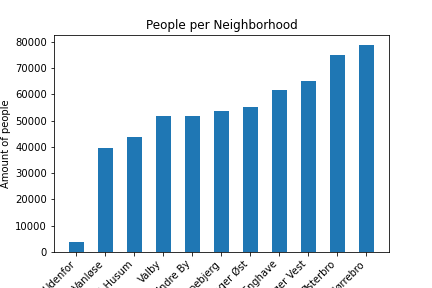

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [3]:
# Make a bar plot to show the size of each city area from the smallest to the largest
%matplotlib notebook
import matplotlib.pyplot as plt

result = get_people_in_neighborhood()
result_sorted = {k: v for k, v in sorted(result.items(), key=lambda item: item[1])}
amount_list = result_sorted.values()
neighborhoods_list = result_sorted.keys()


plt.bar(neighborhoods_list, amount_list, width=0.5, align='center')
title = 'People per Neighborhood'
plt.title(title, fontsize=12)
plt.xlabel('Neighborhoods', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=45, horizontalalignment='right')

In [9]:
# Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

def get_people_above_65():
    mask = (ndarr[:,2] > 65) & (ndarr[:,0] == 2015)
    amount = np.sum(ndarr[mask][:,4])
    return amount

get_people_above_65()

55750

In [10]:
# How many of those were from the other nordic countries (not dk)

def get_people_above_65_from_nordic_contries():
    mask = (ndarr[:,2] > 65) & (ndarr[:,0] == 2015) & ((ndarr[:,3] == 5101) | 
    (ndarr[:,3] == 5104) | (ndarr[:,3] == 5110) | (ndarr[:,3] == 5106) | (ndarr[:,3] == 5120))
    amount = np.sum(ndarr[mask][:,4])
    return amount

get_people_above_65_from_nordic_contries()

608

<IPython.core.display.Javascript object>


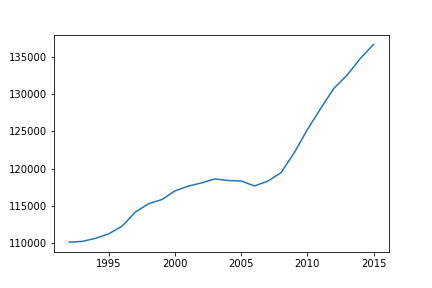

In [4]:
# Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
%matplotlib notebook
import matplotlib.pyplot as plt
def get_people_each_year():
    result = {}
    for i in range(1992,2016):
        mask = (ndarr[:,0] == i) & ((ndarr[:,1] == 2) | (ndarr[:,1] == 4))
        amount = np.sum(ndarr[mask][:,4])
        result[i] = amount
    return result

people = get_people_each_year()
amount = people.values()
years = people.keys()

plt.plot(list(years),list(amount))


In [5]:
# Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015
%matplotlib notebook
import matplotlib.pyplot as plt
def get_people_each_year_v():
    result = {}
    for i in range(1992,2016):
        mask = (ndarr[:,0] == i) & (ndarr[:,1] == 4)
        amount = np.sum(ndarr[mask][:,4])
        result[i] = amount
    return result

def get_people_each_year_oe():
    result = {}
    for i in range(1992,2016):
        mask = (ndarr[:,0] == i) & (ndarr[:,1] == 2)
        amount = np.sum(ndarr[mask][:,4])
        result[i] = amount
    return result

people_v = get_people_each_year_v()
amount_v = people_v.values()
years = people_v.keys()

people_oe = get_people_each_year_oe()
amount_oe = people_oe.values()

#Vesterbro = rød    Østerbro = blå
plt.plot(list(years),list(amount_v), color='red', linewidth=5)
plt.plot(list(years),list(amount_oe),color='blue', linewidth=5)
title = 'People growth in Vesterbro and Østerbro'
plt.title(title, fontsize=12)
plt.xlabel('Vesterbro = rød, Østerbro = blå', fontsize=10)

<IPython.core.display.Javascript object>

TypeError: float() argument must be a string or a number, not 'dict_keys'